In [1]:
% matplotlib inline
import numpy as np
import astropy.io as fits
import math
import matplotlib as mpl
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import sys
sys.path.append('/home/amigos/git/analy_n2data/script')

In [2]:
import make_dset

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']


In [3]:
# classify obsmode
path = ('/home/amigos/shiotani/analy/hdd/HD-LCU31/data/home/amigos/hdd/data/skydip_xffts/20191011103929/')
_d, data, tp = make_dset.get_data(path, '04')
_d2, data2, tp2 = make_dset.get_data(path, '11')

100%|██████████| 3/3 [00:00<00:00, 589.28it/s]

### [  1.57079037e+09   1.57079037e+09   1.57079037e+09 ...,   1.57079049e+09
   1.57079049e+09   1.57079049e+09]
 20.0
 25.0
 30.0
 45.0
 60.0
 70.0
 80.0
 99.0
HOT 0.0
HOT 20.0
HOT 25.0
HOT 30.0
HOT 45.0
HOT 60.0
HOT 70.0
HOT 80.0
SKY 0.0
SKY 99.0
[  1.57079037e+09   1.57079037e+09   1.57079037e+09 ...,   1.57079049e+09
   1.57079049e+09   1.57079049e+09]
['1570790375.5491922', '1570790492.1751986', '', '0.0', '', '']
['1570790374.5435057', '1570790375.498472', 'HOT', '99.0', '', '']
['1570790492.2264228', '1570790493.1901183', 'SKY', '20.0', '', '']
['1570790482.388421', '1570790483.3645627', 'SKY', '25.0', '', '']
['1570790472.4154346', '1570790473.372085', 'SKY', '30.0', '', '']
['1570790456.9945397', '1570790457.9000602', 'SKY', '45.0', '', '']
['1570790441.5257726', '1570790442.4811864', 'SKY', '60.0', '', '']
['1570790428.9853973', '1570790429.9406986', 'SKY', '70.0', '', '']
['1570790416.421942', '1570790417.3271139', 'SKY', '80.0', '', '']



100%|██████████| 3/3 [00:00<00:00, 617.32it/s]

### [  1.57079037e+09   1.57079037e+09   1.57079037e+09 ...,   1.57079049e+09
   1.57079049e+09   1.57079049e+09]
 20.0
 25.0
 30.0
 45.0
 60.0
 70.0
 80.0
 99.0
HOT 0.0
HOT 20.0
HOT 25.0
HOT 30.0
HOT 45.0
HOT 60.0
HOT 70.0
HOT 80.0
SKY 0.0
SKY 99.0
[  1.57079037e+09   1.57079037e+09   1.57079037e+09 ...,   1.57079049e+09
   1.57079049e+09   1.57079049e+09]
['1570790375.5491922', '1570790492.1751986', '', '0.0', '', '']
['1570790374.5435057', '1570790375.498472', 'HOT', '99.0', '', '']
['1570790492.2264228', '1570790493.1901183', 'SKY', '20.0', '', '']
['1570790482.388421', '1570790483.3645627', 'SKY', '25.0', '', '']
['1570790472.4154346', '1570790473.372085', 'SKY', '30.0', '', '']
['1570790456.9945397', '1570790457.9000602', 'SKY', '45.0', '', '']
['1570790441.5257726', '1570790442.4811864', 'SKY', '60.0', '', '']
['1570790428.9853973', '1570790429.9406986', 'SKY', '70.0', '', '']
['1570790416.421942', '1570790417.3271139', 'SKY', '80.0', '', '']


In [4]:
d = np.array(_d)
obsmode = d.T[0]
elmode = d.T[1]
skymask = obsmode =='SKY'
hotmask = obsmode =='HOT'

el_80_mask = elmode =='80.0'
el_70_mask = elmode =='70.0'
el_60_mask = elmode =='60.0'
el_45_mask = elmode =='45.0'
el_30_mask = elmode =='30.0'
el_25_mask = elmode =='25.0'
el_20_mask = elmode =='20.0'

In [8]:
_totalpower = np.array(tp)
_totalpower2 = np.array(tp2)
totalpower_list = _totalpower.T[2]
totalpower_list2 = _totalpower2.T[2]
skylist_80 = np.mean(totalpower_list[el_80_mask])
skylist_70 = np.mean(totalpower_list[el_70_mask])
skylist_60 = np.mean(totalpower_list[el_60_mask])
skylist_45 = np.mean(totalpower_list[el_45_mask])
skylist_30 = np.mean(totalpower_list[el_30_mask])
skylist_25 = np.mean(totalpower_list[el_25_mask])
skylist_20 = np.mean(totalpower_list[el_20_mask])
hotlist = totalpower_list[hotmask]
skylist2 = totalpower_list2[skymask]
skylist2_80 = np.mean(totalpower_list2[el_80_mask])
skylist2_70 = np.mean(totalpower_list2[el_70_mask])
skylist2_60 = np.mean(totalpower_list2[el_60_mask])
skylist2_45 = np.mean(totalpower_list2[el_45_mask])
skylist2_30 = np.mean(totalpower_list2[el_30_mask])
skylist2_25 = np.mean(totalpower_list2[el_25_mask])
skylist2_20 = np.mean(totalpower_list2[el_20_mask])
hotlist2 = totalpower_list2[hotmask]

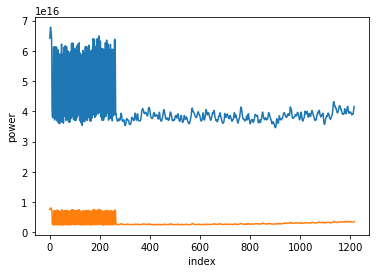

In [9]:
plt.plot(totalpower_list)
plt.plot(totalpower_list2)
plt.xlabel('index')
plt.ylabel('power')

In [10]:
d_integ1 = [skylist_80, skylist_70, skylist_60, skylist_45, skylist_30, skylist_25, skylist_20]
d_integ2 = [skylist2_80, skylist2_70, skylist2_60, skylist2_45, skylist2_30, skylist2_25, skylist2_20]
d_hot_integ1=hotlist.mean()
d_hot_integ2=hotlist2.mean()
z = [80, 70, 60, 45, 30, 25, 20]

In [11]:
#print(d_integ1)

In [12]:
# calc tau
#log(p_hot-p_sky)のlistの作成                                                   
d_hot_sky1 = []
d_hot_sky2 = []

for i in range(len(d_integ1)):
    d_temp = d_hot_integ1-d_integ1[i]
    d_temp2 = math.log(d_temp)
    d_hot_sky1 = d_hot_sky1 + [d_temp2]

for i in range(len(d_integ2)):
    d_temp = d_hot_integ2-d_integ2[i]
    d_temp2 = math.log(d_temp)
    d_hot_sky2 = d_hot_sky2 + [d_temp2]



[36.68352333794294, 36.79129759060179, 36.790890902377036, 36.898017908186546, 36.85875449997423, 36.76667866805365, 36.68806099501103]
[35.34259970121004, 35.360268530037914, 35.32669001311892, 35.258865651563184, 35.14456460815472, 34.99414632860158, 34.884641871756635]
[1.0154266118857451, 1.064177772475912, 1.1547005383792515, 1.414213562373095, 1.9999999999999996, 2.3662015831524985, 2.9238044001630863]
[1.0154266118857451, 1.064177772475912, 1.1547005383792515, 1.414213562373095, 1.9999999999999996, 2.3662015831524985, 2.9238044001630863]


<function matplotlib.pyplot.show>

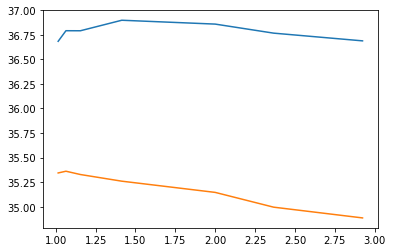

In [13]:
#seczの計算                                                                     
_z = []
for i in range(len(z)):
    __z = 90 - z[i]
    _z.append(__z)

secz = []
for i in range(len(_z)):
    secz_temp = (_z[i]/180)*math.pi
    secz.append(1/math.cos(secz_temp))

print(d_hot_sky1)
print(d_hot_sky2)

print(secz)

_secz = sorted(secz, reverse=False)
print(secz)
import matplotlib.pyplot as plt2
#fig = plt2.figure(figsize=(20.0, 6.0))
#ax = fig.add_subplot(111)
#ax.plot(d_hot_sky1)
plt2.plot(secz, d_hot_sky1)
plt2.plot(secz, d_hot_sky2)
plt2.show

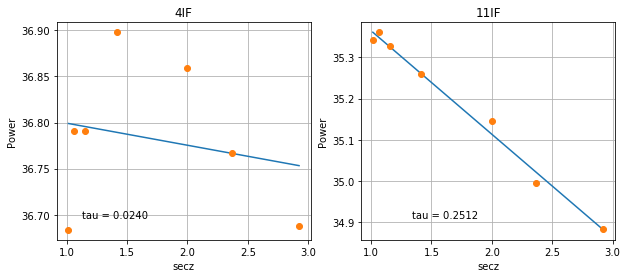

In [14]:
mpl.rcParams['figure.facecolor'] = 'white'
fit_array1 = np.polyfit(secz, d_hot_sky1,1)
fit_array2 = np.polyfit(secz, d_hot_sky2,1)
fig, (axL, axR) = plt.subplots(ncols = 2, figsize = (10,4))

axL.plot(secz, np.poly1d(fit_array1)(secz), label="dfs1")
axL.plot(secz, d_hot_sky1, 'o')
axL.set_title('4IF')
axL.set_xlabel('secz')
axL.set_ylabel('Power')

axR.plot(secz, np.poly1d(fit_array2)(secz), label="dfs1")
axR.plot(secz, d_hot_sky2, 'o')
axR.set_title('11IF')
axR.set_xlabel('secz')
axR.set_ylabel('Power')
axR.text(0.1, 0.1, 'tau = {:.4f}'.format(-1*fit_array1[0]), transform = axL.transA\
xes)
axR.text(1.4, 0.1, 'tau = {:.4f}'.format(-1*fit_array2[0]) , transform = axL.trans\
Axes)

axL.grid()
axR.grid()
plt.show()

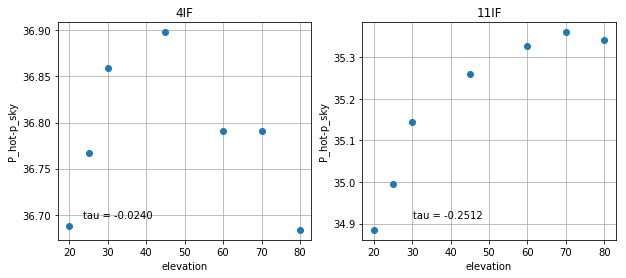

In [15]:
#fit_array1 = np.polyfit(secz, d_hot_sky1,1)
#fit_array2 = np.polyfit(secz, d_hot_sky2,1)
fig, (axL, axR) = plt.subplots(ncols = 2, figsize = (10,4))

#axL.plot(secz, np.poly1d(fit_array1)(secz), label="dfs1")
axL.plot(z, d_hot_sky1, 'o')
axL.set_title('4IF')
axL.set_xlabel('elevation')
axL.set_ylabel('P_hot-p_sky')

#axR.plot(secz, np.poly1d(fit_array2)(secz), label="dfs1")
axR.plot(z, d_hot_sky2, 'o')
axR.set_title('11IF')
axR.set_xlabel('elevation')
axR.set_ylabel('P_hot-p_sky')
axR.text(0.1, 0.1, 'tau = {:.4f}'.format(fit_array1[0]), transform = axL.transA\
xes)
axR.text(1.4, 0.1, 'tau = {:.4f}'.format(fit_array2[0]) , transform = axL.trans\
Axes)

axL.grid()
axR.grid()
plt.show()